# GOALS:
- Generate numerical ranges of matrices with norm-0 eigenvectors in $\mathbb{Z}_7[i]^2$
- We can have:
    - 1 or 2 norm-0 eigenvectors
    - 1 or 2 unique eigenvalues
    - Complex, strictly real, or strictly imaginary eigenvalues

In [1]:
import numpy as np
from Imports.linalg_Zpi import linalg_Zpi
from Imports.numrange_Zpi import numrange_Zpi

In [2]:
linalg = linalg_Zpi(n=2, p=7)
norm0 = np.load("Imports/norm0/p=7_n=2.npz")["norm0"]
print(norm0)

[[[0.+1.j]
  [2.+3.j]]

 [[0.+1.j]
  [2.+4.j]]

 [[0.+1.j]
  [3.+2.j]]

 [[0.+1.j]
  [3.+5.j]]

 [[0.+1.j]
  [4.+2.j]]

 [[0.+1.j]
  [4.+5.j]]

 [[0.+1.j]
  [5.+3.j]]

 [[0.+1.j]
  [5.+4.j]]]


## Test 1: 1 norm-0 eigenvector, 1 unique complex eigenvalue

In [3]:
np.random.seed(seed=2)

In [4]:
# This function should eventually be incorporated into the linalg_Zpi package

def norm(v):
    return int(linalg.prod((np.conj(v.transpose()),v)).real.item())

In [5]:
rand = np.random.randint(0,7,4)

vec = np.array([[complex(rand[0], rand[1])],
                [complex(rand[2], rand[3])]
               ], dtype=np.csingle)

print(vec)
print(norm(vec))

[[0.+5.j]
 [0.+6.j]]
5


In [6]:
rand = np.random.randint(0,7)
print(norm0[rand])

vecs = (norm0[rand], vec)

[[0.+1.j]
 [3.+5.j]]


In [7]:
rand = np.random.randint(0,7,2)
val = complex(rand[0], rand[1])

vals = (val, val)

print(val)

(2+3j)


In [8]:
M1 = linalg.from_eigen(vecs=vecs, vals=vals)
print(M1) # Okay... that should've been a bit obvious but oh whell

[[2.+3.j 0.+0.j]
 [0.+0.j 2.+3.j]]


[0.+0.j]


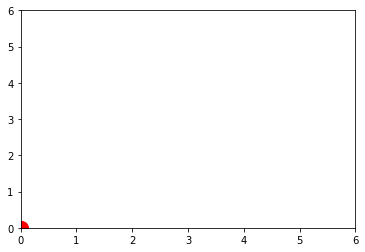

In [9]:
W_M1 = numrange_Zpi(n=2, p=7, M=M1)
print(W_M1.W0())

## Test 2: 1 norm-0 eigenvector, 2 unique complex eigenvalues

In [10]:
np.random.seed(seed=2)

In [11]:
rand = np.random.randint(0,7,2)
val = complex(rand[0], rand[1])

vals = (vals[0], val)
print(vals)

((2+3j), 5j)


In [12]:
M2 = linalg.from_eigen(vecs=vecs, vals=vals)
print(M2)

[[1.+2.j 5.+6.j]
 [3.+3.j 1.+6.j]]


[0.+0.j 0.+6.j 2.+5.j 3.+0.j 3.+5.j 4.+1.j 4.+6.j 5.+1.j]


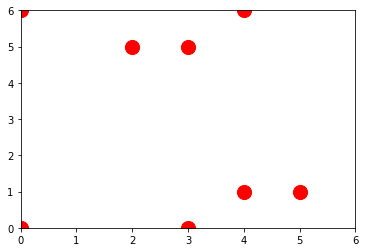

In [13]:
W_M2 = numrange_Zpi(n=2, p=7, M=M2)
print(W_M2.W0())

## Test 3: Do it again!

In [14]:
rand = np.random.randint(0,7,4)

vec = np.array([[complex(rand[0], rand[1])],
                [complex(rand[2], rand[3])]
               ], dtype=np.csingle)

print(vec)
print(norm(vec))

[[0.+6.j]
 [3.+2.j]]
0


In [15]:
rand = np.random.randint(0,7)
print(norm0[rand])

vecs = (norm0[rand], vec)

[[0.+1.j]
 [3.+5.j]]


In [16]:
rand = np.random.randint(0,7,4)
vals = (complex(rand[0], rand[1]), complex(rand[2], rand[3]))

print(vals)

(2j, (1+3j))


In [17]:
M3 = linalg.from_eigen(vecs=vecs, vals=vals)
print(M3)

[[2.+1.j 6.+1.j]
 [6.+1.j 6.+4.j]]


[0.+0.j 2.+5.j 4.+3.j 6.+1.j]


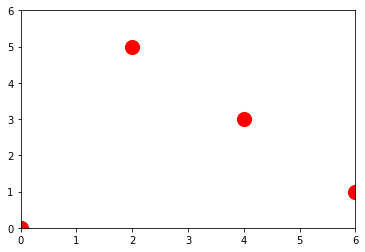

In [18]:
W_M3 = numrange_Zpi(n=2, p=7, M=M3)

W0_3 = W_M3.W0()
print(W0_3)

# Is this perhaps a line of some sort?

In [19]:
# I'm not seeing any sort of constant difference...
np.diff(W0_3)

array([2.+5.j, 2.-2.j, 2.-2.j], dtype=complex64)

## Test 4: Again!

In [20]:
np.random.seed(seed=2)

Eigenvector 1: 
[[0.+5.j]
 [0.+6.j]]
Eigenvector 1 Norm: 5
Eigenvector 2: 
[[0.+1.j]
 [3.+5.j]]
Eigenvalues:((2+3j), 2j)
Matrix: 
[[6.+2.j 2.+0.j]
 [2.+3.j 3.+3.j]]
Numerical range:[0.+0.j 0.+1.j 2.+1.j 2.+5.j 4.+0.j 4.+4.j 6.+4.j 6.+5.j]
Difference between consecutive elements: [0.+1.j 2.+0.j 0.+4.j 2.-5.j 0.+4.j 2.+0.j 0.+1.j]


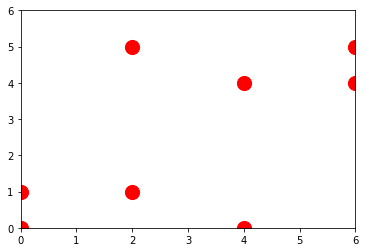

In [21]:
rand = np.random.randint(0,7,4)

vec = np.array([[complex(rand[0], rand[1])],
                [complex(rand[2], rand[3])]
               ], dtype=np.csingle)

print("Eigenvector 1: \n"+str(vec))
print("Eigenvector 1 Norm: "+str(norm(vec)))

rand = np.random.randint(0,7)
print("Eigenvector 2: \n"+str(norm0[rand]))

vecs = (norm0[rand], vec)

rand = np.random.randint(0,7,4)
vals = (complex(rand[0], rand[1]), complex(rand[2], rand[3]))

print("Eigenvalues:"+str(vals))

M4 = linalg.from_eigen(vecs=vecs, vals=vals)
print("Matrix: \n"+str(M4))

W_M4 = numrange_Zpi(n=2, p=7, M=M4)

W0_4 = W_M4.W0()
print("Numerical range:"+str(W0_4))
print("Difference between consecutive elements: "+str(np.diff(W0_4)))

## Test 5: 1 norm-0 eigenvector, 2 unique strictly-real eigenvalues

In [22]:
np.random.seed(seed=2)

Eigenvector 1: 
[[0.+5.j]
 [0.+6.j]]
Eigenvector 1 Norm: 5
Eigenvector 2: 
[[0.+1.j]
 [3.+5.j]]
Eigenvalues:(2, 3)
Matrix: 
[[2.+4.j 2.+6.j]
 [0.+2.j 3.+3.j]]
Numerical range:[0.+0.j 1.+1.j 1.+4.j 4.+1.j 4.+5.j 5.+2.j 6.+0.j 6.+2.j]
Difference between consecutive elements: [1.+1.j 0.+3.j 3.-3.j 0.+4.j 1.-3.j 1.-2.j 0.+2.j]


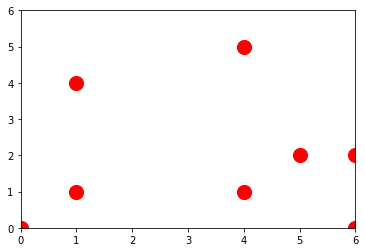

In [23]:
rand = np.random.randint(0,7,4)

vec = np.array([[complex(rand[0], rand[1])],
                [complex(rand[2], rand[3])]
               ], dtype=np.csingle)

print("Eigenvector 1: \n"+str(vec))
print("Eigenvector 1 Norm: "+str(norm(vec)))

rand = np.random.randint(0,7)
print("Eigenvector 2: \n"+str(norm0[rand]))

vecs = (norm0[rand], vec)

rand = np.random.randint(0,7,2)
vals = (rand[0], rand[1])

print("Eigenvalues:"+str(vals))

M5 = linalg.from_eigen(vecs=vecs, vals=vals)
print("Matrix: \n"+str(M5))

W_M5 = numrange_Zpi(n=2, p=7, M=M5)

W0_5 = W_M5.W0()
print("Numerical range:"+str(W0_5))
print("Difference between consecutive elements: "+str(np.diff(W0_5)))

## Test 6: 2 norm-0 eigenvectors, 1 unique complex eigenvalue

In [24]:
np.random.seed(seed=2)

Eigenvector 1: 
[[0.+1.j]
 [2.+3.j]]
Eigenvector 2: 
[[0.+1.j]
 [4.+5.j]]
Eigenvalues:(6j, 6j)
Matrix: 
[[0.+6.j 0.+0.j]
 [0.+0.j 0.+6.j]]
Numerical range:[0.+0.j]
Difference between consecutive elements: []


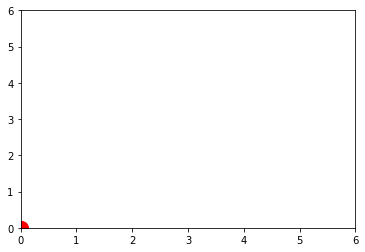

In [25]:
rand = np.random.randint(0,7,2)
print("Eigenvector 1: \n"+str(norm0[rand[0]]))
print("Eigenvector 2: \n"+str(norm0[rand[1]]))

vecs = (norm0[rand[0]], norm0[rand[1]])

rand = np.random.randint(0,7,2)
val = complex(rand[0], rand[1])
vals = (val, val)

print("Eigenvalues:"+str(vals))

M6 = linalg.from_eigen(vecs=vecs, vals=vals)
print("Matrix: \n"+str(M6))

W_M6 = numrange_Zpi(n=2, p=7, M=M6)

W0_6 = W_M6.W0()
print("Numerical range:"+str(W0_6))
print("Difference between consecutive elements: "+str(np.diff(W0_6)))

## Test 7: 2 norm-0 eigenvectors, 2 unique complex eigenvalues

In [26]:
np.random.seed(seed=2)

Eigenvector 1: 
[[0.+1.j]
 [2.+3.j]]
Eigenvector 2: 
[[0.+1.j]
 [4.+5.j]]
Eigenvalues:(6j, (3+2j))
Matrix: 
[[4.+5.j 0.+5.j]
 [2.+0.j 6.+3.j]]
Numerical range:[0.+0.j 1.+6.j 2.+5.j 3.+4.j]
Difference between consecutive elements: [1.+6.j 1.-1.j 1.-1.j]


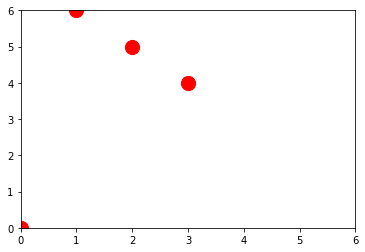

In [27]:
rand = np.random.randint(0,7,2)
print("Eigenvector 1: \n"+str(norm0[rand[0]]))
print("Eigenvector 2: \n"+str(norm0[rand[1]]))

vecs = (norm0[rand[0]], norm0[rand[1]])

rand = np.random.randint(0,7,4)
vals = (complex(rand[0], rand[1]), complex(rand[2], rand[3]))

print("Eigenvalues:"+str(vals))

M7 = linalg.from_eigen(vecs=vecs, vals=vals)
print("Matrix: \n"+str(M7))

W_M7 = numrange_Zpi(n=2, p=7, M=M7)

W0_7 = W_M7.W0()
print("Numerical range:"+str(W0_7))
print("Difference between consecutive elements: "+str(np.diff(W0_7)))

## Test 8: 2 norm-0 eigenvectors, 2 complex eigenvalues that are multiples of each other?

Eigenvector 1: 
[[0.+1.j]
 [3.+5.j]]
Eigenvector 2: 
[[0.+1.j]
 [2.+3.j]]
Scalar multiple: 3
Eigenvalues:((2+1j), (6+3j))
Matrix: 
[[3.+4.j 3.+4.j]
 [2.+0.j 5.+0.j]]
Numerical range:[0.+0.j 3.+1.j 4.+6.j 5.+4.j 6.+2.j]
Difference between consecutive elements: [3.+1.j 1.+5.j 1.-2.j 1.-2.j]


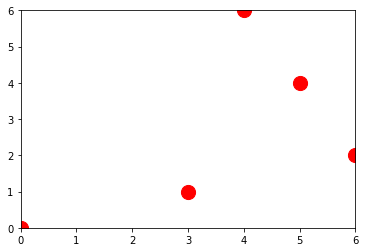

In [28]:
rand = np.random.randint(0,7,2)
print("Eigenvector 1: \n"+str(norm0[rand[0]]))
print("Eigenvector 2: \n"+str(norm0[rand[1]]))

vecs = (norm0[rand[0]], norm0[rand[1]])

rand = np.random.randint(0,7,3)
val = complex(rand[0], rand[1])
vals = (val, linalg.sim_s(rand[2]*val))

print("Scalar multiple: "+str(rand[2]))
print("Eigenvalues:"+str(vals))

M8 = linalg.from_eigen(vecs=vecs, vals=vals)
print("Matrix: \n"+str(M8))

W_M8 = numrange_Zpi(n=2, p=7, M=M8)

W0_8 = W_M8.W0()
print("Numerical range:"+str(W0_8))
print("Difference between consecutive elements: "+str(np.diff(W0_8)))

# Interesting Cases

## Horizontal line
Eigenvector 1: 
[[0.+1.j]
 [3.+5.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [4.+5.j]]
 
Scalar multiple: 6

Eigenvalues:(4j, 3j)

Matrix: 
[[2.+0.j 1.+0.j]
 [1.+0.j 5.+0.j]]
 
Numerical range:[0.+0.j 1.+0.j 3.+0.j 5.+0.j]

Difference between consecutive elements: [1.+0.j 2.+0.j 2.+0.j]

## Diagonal line
Eigenvector 1: 
[[0.+1.j]
 [3.+2.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [4.+2.j]]
 
Eigenvalues:((4+4j), (5+3j))

Matrix: 
[[6.+5.j 1.+1.j]
 [1.+1.j 3.+2.j]]
 
Numerical range:[0.+0.j 2.+2.j 4.+4.j 6.+6.j]

Difference between consecutive elements: [2.+2.j 2.+2.j 2.+2.j]

## Vertical line with holes in it
Eigenvector 1: 
[[0.+1.j]
 [2.+4.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [5.+3.j]]
 
Eigenvalues:(2j, (5+2j))

Matrix: 
[[6.+2.j 3.+5.j]
 [4.+5.j 6.+2.j]]
 
Numerical range:[0.+0.j 0.+2.j 0.+3.j 0.+4.j 0.+5.j]

Difference between consecutive elements: [0.+2.j 0.+1.j 0.+1.j 0.+1.j]

## Horizontal line with LOTS of holes in it
Eigenvector 1: 
[[0.+1.j]
 [2.+4.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [4.+5.j]]
 
Scalar multiple: 6

Eigenvalues:(1j, 6j)

Matrix: 
[[6.+0.j 5.+1.j]
 [5.+6.j 1.+0.j]]
 
Numerical range:[0.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j]

Difference between consecutive elements: [3.+0.j 1.+0.j 1.+0.j 1.+0.j]

## Strange line-but-not-line?
Eigenvector 1: 
[[0.+1.j]
 [2.+4.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [5.+3.j]]
 
Scalar multiple: 6

Eigenvalues:((4+2j), (3+5j))

Matrix: 
[[0.+0.j 2.+5.j]
 [6.+0.j 0.+0.j]]
 
Numerical range:[0.+0.j 1.+5.j 3.+1.j 4.+6.j 6.+2.j]

Difference between consecutive elements: [1.+5.j 2.-4.j 1.+5.j 2.-4.j]

## No clue but I'm adding it in for the giggles
Eigenvector 1: 
[[0.+1.j]
 [2.+4.j]]
 
Eigenvector 2: 
[[0.+1.j]
 [3.+2.j]]
 
Scalar multiple: 6

Eigenvalues:((4+2j), (3+5j))

Matrix: 
[[2.+3.j 4.+0.j]
 [6.+1.j 5.+4.j]]
 
Numerical range:[0.+0.j 1.+5.j 2.+3.j 4.+6.j 6.+2.j]

Difference between consecutive elements: [1.+5.j 1.-2.j 2.+3.j 2.-4.j]

## Another weird-looking one
[[1.+2.j 5.+6.j]
 [3.+3.j 1.+6.j]]
 
((2+3j), 5j)

# Thoughts and ideas and stuff:
- Build a graphical classifier that can help us sort thing?
- Generate a ton of graphs on the server and make a huge table with columns for index, val1, val2, vec1, vec2; have the images sorted by index, then manually go through and pick out the ones that are interesting and reference the details in the table
- I also need to brute-force generate some more norm-0 vectors for Kristin
- I will need to figure out how to retrieve things from the server onto my computer...